<a href="https://colab.research.google.com/github/MorrisLesinko/Machine_Learning_Projects/blob/main/GNN_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

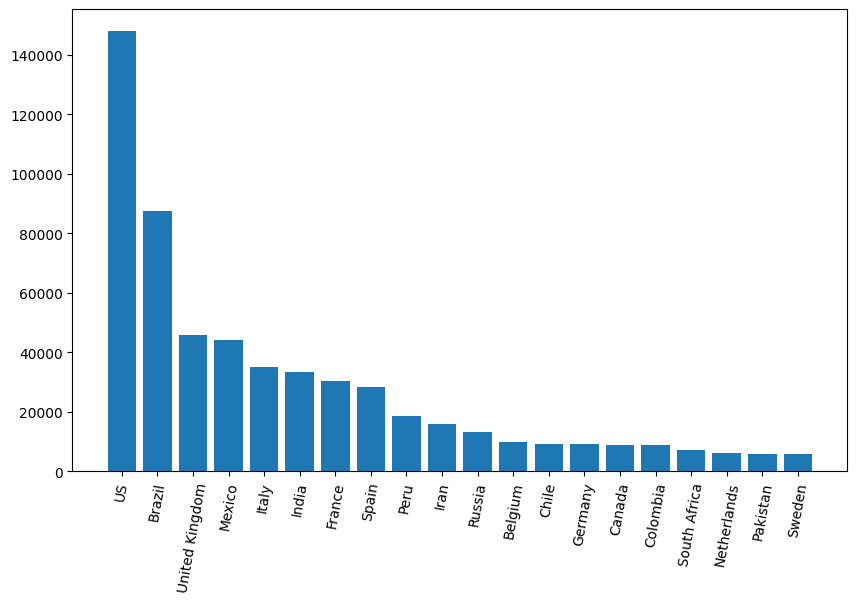

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

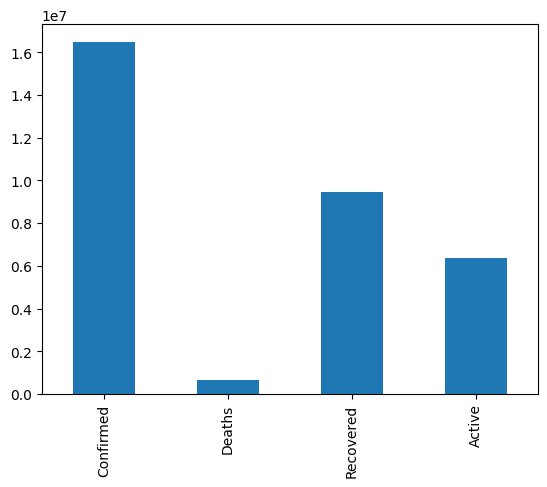

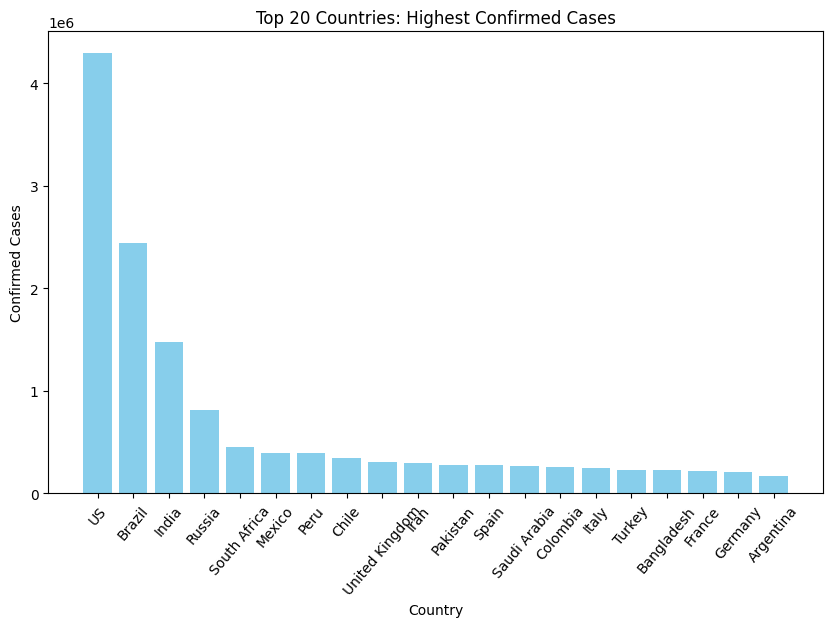

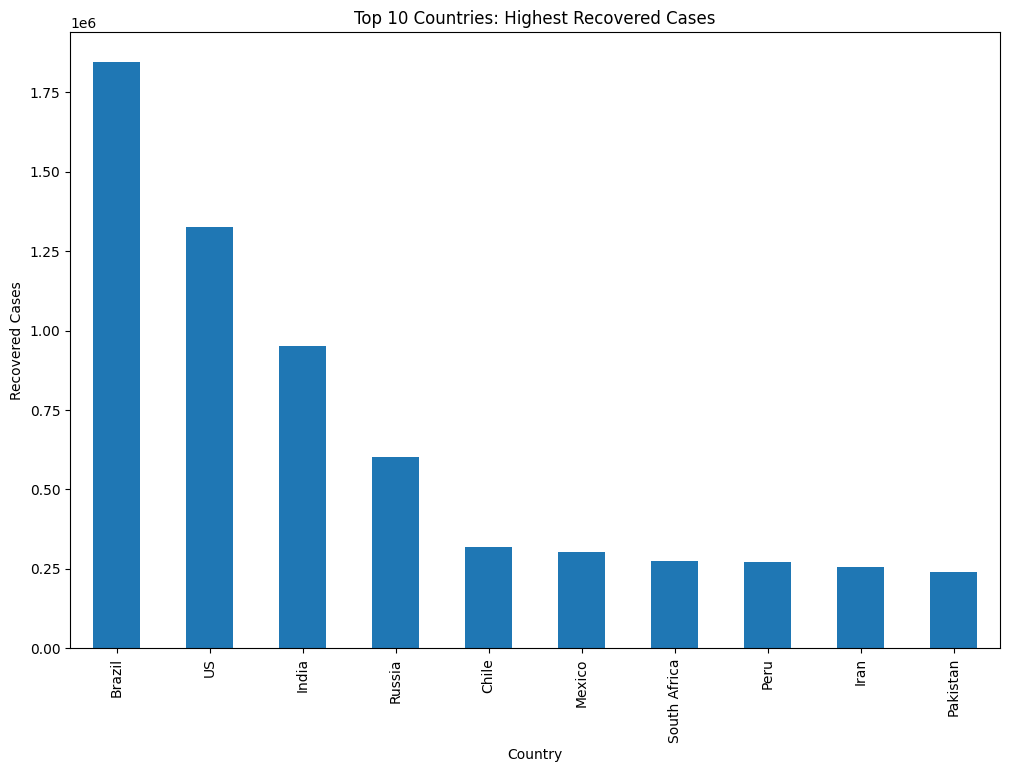

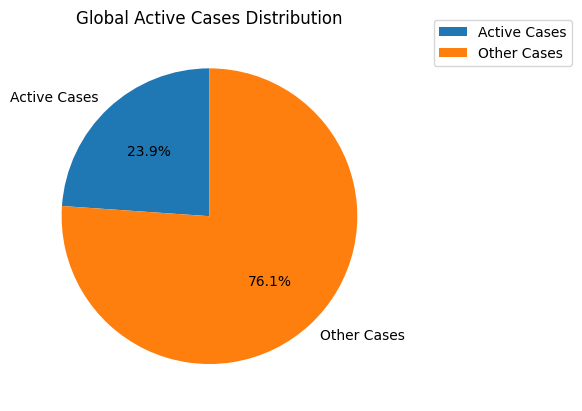

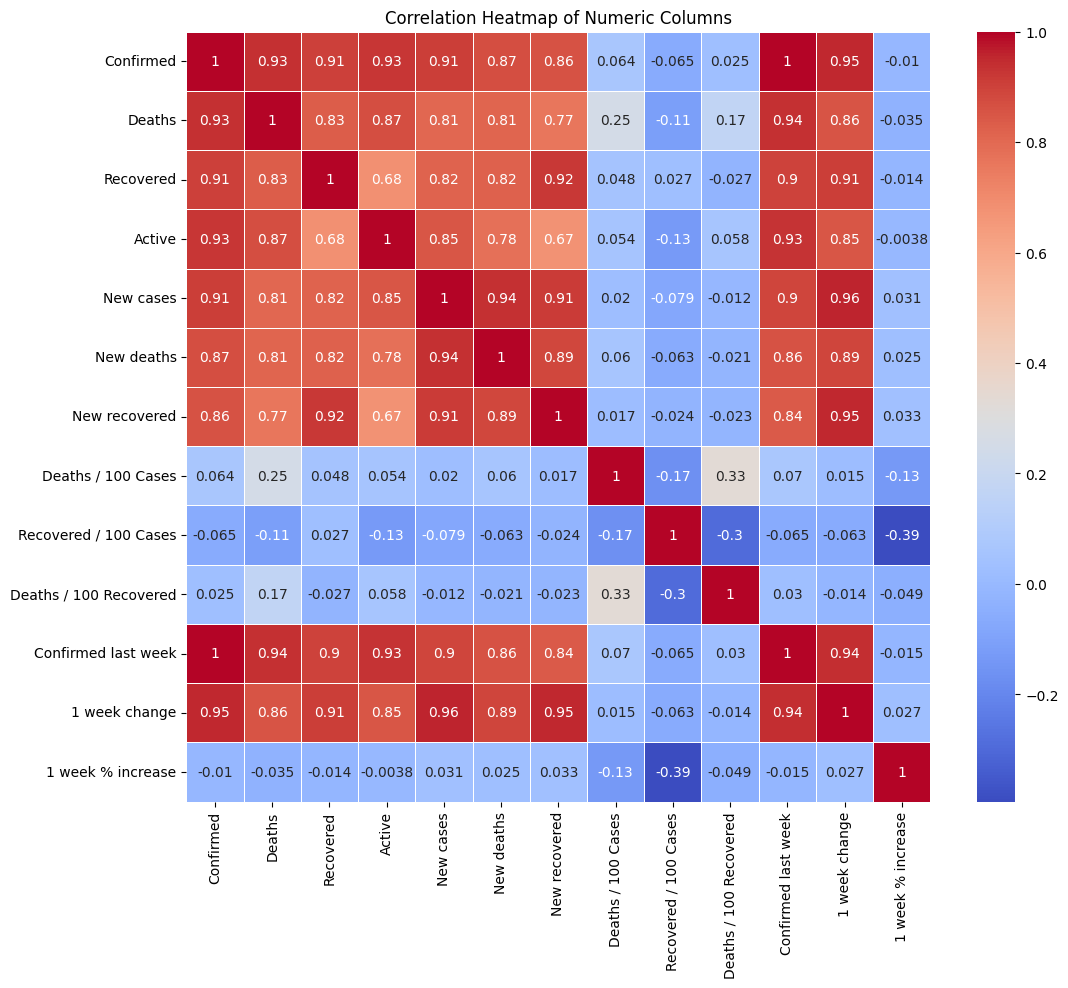

Infinite values in X_train: 4
Infinite values in X_test: 1
Model: "gat_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gat_conv_6 (GATConv)        multiple                  168       
                                                                 
 dropout_4 (Dropout)         multiple                  0         
                                                                 
 gat_conv_7 (GATConv)        multiple                  11        
                                                                 
Total params: 179 (716.00 Byte)
Trainable params: 179 (716.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning:

The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.



ValueError: Exception encountered when calling layer "gat_lstm__model_2" (type GAT_LSTM_Model).

in user code:

    File "<ipython-input-5-f1c489d911b9>", line 217, in call  *
        x_gat = self.gat([x, a])
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filemixqawz7.py", line 14, in tf___inner_check_dtypes
        retval_ = ag__.converted_call(ag__.ld(call), (ag__.ld(inputs),), dict(**ag__.ld(kwargs)), fscope)
    File "/tmp/__autograph_generated_fileutgu6kwn.py", line 11, in tf__call
        mode = ag__.converted_call(ag__.ld(ops).autodetect_mode, (ag__.ld(x), ag__.ld(a)), None, fscope)
    File "/tmp/__autograph_generated_file81jocsbn.py", line 92, in tf__autodetect_mode
        ag__.if_stmt(ag__.and_(lambda : ag__.ld(x_ndim) == 2, lambda : ag__.ld(a_ndim) == 2), if_body_2, else_body_2, get_state_2, set_state_2, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_file81jocsbn.py", line 91, in else_body_2
        ag__.if_stmt(ag__.and_(lambda : ag__.ld(x_ndim) == 3, lambda : ag__.ld(a_ndim) == 3), if_body_1, else_body_1, get_state_1, set_state_1, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_file81jocsbn.py", line 90, in else_body_1
        ag__.if_stmt(ag__.and_(lambda : ag__.ld(x_ndim) == 3, lambda : ag__.ld(a_ndim) == 2), if_body, else_body, get_state, set_state, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_file81jocsbn.py", line 89, in else_body
        raise ag__.converted_call(ag__.ld(ValueError), (ag__.converted_call('Unknown mode for inputs x, a with ranks {} and {}respectively.'.format, (ag__.ld(x_ndim), ag__.ld(a_ndim)), None, fscope),), None, fscope)

    ValueError: Exception encountered when calling layer 'gat_conv_8' (type GATConv).
    
    in user code:
    
        File "/usr/local/lib/python3.10/dist-packages/spektral/layers/convolutional/conv.py", line 167, in _inner_check_dtypes  *
            return call(inputs, **kwargs)
        File "/usr/local/lib/python3.10/dist-packages/spektral/layers/convolutional/gat_conv.py", line 167, in call  *
            mode = ops.autodetect_mode(x, a)
        File "/usr/local/lib/python3.10/dist-packages/spektral/layers/ops/modes.py", line 103, in autodetect_mode  *
            raise ValueError(
    
        ValueError: Unknown mode for inputs x, a with ranks 2 and 3respectively.
    
    
    Call arguments received by layer 'gat_conv_8' (type GATConv):
      • inputs=['tf.Tensor(shape=(None, 18), dtype=float32)', 'tf.Tensor(shape=(None, 149, 149), dtype=float32)']
      • mask=None


Call arguments received by layer "gat_lstm__model_2" (type GAT_LSTM_Model):
  • inputs=['tf.Tensor(shape=(None, 18), dtype=float32)', 'tf.Tensor(shape=(None, 149, 149), dtype=float32)']

In [ ]:
# Import necessary libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from spektral.layers import GATConv
from spektral.data import Graph, Loader
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense
from sklearn.model_selection import train_test_split
import plotly.express as px




# Load the data
df =pd.read_csv("/content/country_wise_latest.csv")
df.head()
# Display the shape of the dataframe
shape = df.shape

# Check for missing values
missing_values = df.isna().sum()

# Get descriptive statistics
descriptive_stats = df.describe()

shape, missing_values, descriptive_stats

df = df.drop_duplicates()
country_deaths = df[['Country/Region', 'Deaths']]

#Sorting by 'Deaths' in descending order for better visualization
country_deaths = country_deaths.sort_values(by='Deaths', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(country_deaths['Country/Region'].head(20), country_deaths['Deaths'].head(20))
plt.xticks(rotation=80)
plt.show()

df.columns
df.info()
column_names = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Calculate the sum of specified columns
column_sums = df[column_names].sum().plot(kind="bar")

# Sorting by 'Confirmed' in descending order for better visualization
country_confirmed = df.sort_values(by='Confirmed', ascending=False)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(country_confirmed['Country/Region'].head(20), country_confirmed['Confirmed'].head(20), color='skyblue')
plt.title('Top 20 Countries: Highest Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=50)
plt.show()

top_10_confirmed = df.groupby('Country/Region')['Recovered'].max().nlargest(10)
top_10_confirmed.plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Countries: Highest Recovered Cases')
plt.xlabel('Country')
plt.ylabel('Recovered Cases')
plt.show()

global_active_cases = df['Active'].sum()
global_cases = df[['Confirmed', 'Deaths', 'Recovered']].sum().sum()
labels = ['Active Cases', 'Other Cases']
sizes = [global_active_cases, global_cases - global_active_cases]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Global Active Cases Distribution')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.5, 1.05))
plt.show()


# Sorting the data by total deaths in descending order
df_deaths = df.sort_values(by='Deaths', ascending=False)

# Selecting the top 10 countries with the highest deaths
top_10_deaths = df_deaths.head(15)

# Sorting the data by total recoveries in descending order
df_recoveries = df.sort_values(by='Recovered', ascending=False)

# Selecting the top 10 countries with the highest recoveries
top_10_recoveries = df_recoveries.head(15)

# Create an interactive line chart with Plotly
fig = px.line(top_10_deaths, x='Country/Region', y='Deaths', title='Top 10 Countries: Deaths vs Recovered',
              labels={'Deaths': 'Total Deaths'},
              line_shape='linear',  # 'linear' or 'hv' (horizontal/vertical)
              markers=True,  # Show markers for data points
              line_dash_sequence=['solid'],  # Style of the line
              template='plotly_dark')  # Dark theme for the chart

# Add a line for total recoveries
fig.add_trace(px.line(top_10_recoveries, x='Country/Region', y='Recovered').data[0])

# Show the plot
fig.show()

# Drop non-numeric columns if any
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# One-hot encode 'WHO Region' and drop 'Country/Region'
df_encoded = pd.get_dummies(df.drop(['Country/Region', 'New cases'], axis=1), columns=['WHO Region'])

# Features and target variable
X = df_encoded
y = df['New cases']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for infinite values in the dataset
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())

# Replace infinities with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Option 1: Impute NaN values with the mean (you could also use median or a constant)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Normalize the features with the data where infinite values have been handled
scaler =StandardScaler ()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)



# Placeholder adjacency matrix - in practice, define based on your specific criteria
num_countries = X_train_scaled.shape[0]
A = np.zeros((num_countries, num_countries))

# Example: Simple connection (fully connected)
# Note: This is overly simplistic and not practical for real analysis
for i in range(num_countries):
    for j in range(num_countries):
        if i != j:
            A[i, j] = 1  # Assumes every country is connected to every other

# Define the GAT model
class GATModel(Model):
    def __init__(self, n_features, n_classes=1, **kwargs):
        super(GATModel, self).__init__(**kwargs)
        self.gat_1 = GATConv(8, activation="elu", kernel_regularizer='l2')
        self.dropout = Dropout(0.6)
        self.gat_2 = GATConv(n_classes, activation="linear")

    def call(self, inputs):
        x, a = inputs
        x = self.gat_1([x, a])
        x = self.dropout(x)
        x = self.gat_2([x, a])
        return x

# Assuming num_features as the number of features after preprocessing
num_features = X_train_scaled.shape[1]

# Dummy adjacency matrix creation for demonstration
num_countries = X_train_scaled.shape[0]
A_dummy = np.zeros((num_countries, num_countries))
np.fill_diagonal(A_dummy, 1)

# Initialize the model
model = GATModel(num_features)
X_input = Input(shape=(num_features,))
A_input = Input(shape=(num_countries,))
model([X_input, A_input])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

from tensorflow.keras.layers import LSTM, Concatenate, Reshape
from spektral.layers import GATConv
import tensorflow as tf
import numpy as np

class GAT_LSTM_Model(tf.keras.Model):
    def __init__(self, num_features, num_nodes, num_lstm_units, **kwargs):
        super(GAT_LSTM_Model, self).__init__(**kwargs)
        self.gat = GATConv(8, activation='elu', kernel_regularizer='l2')
        self.dropout = tf.keras.layers.Dropout(0.6)
        self.lstm = tf.keras.layers.LSTM(num_lstm_units)
        self.concat = tf.keras.layers.Concatenate()
        self.dense = tf.keras.layers.Dense(1)
        self.reshape = Reshape((-1, num_nodes))

    def call(self, inputs):
        x, a = inputs
        x_gat = self.gat([x, a])
        x_gat = self.dropout(x_gat)
        x_gat = self.reshape(x_gat)
        x_lstm = self.lstm(x_gat)
        x_concat = self.concat([x_gat, x_lstm])
        return self.dense(x_concat)

# Assuming num_features as the number of features after preprocessing
num_features = X_train_scaled.shape[1]
num_lstm_units = 64  # Number of units in the LSTM layer
num_nodes = X_train_scaled.shape[0]  # Number of nodes (countries)

# Create a dummy adjacency matrix for demonstration
A = np.zeros((num_nodes, num_nodes, num_features))

# Initialize the model
model = GAT_LSTM_Model(num_features, num_nodes, num_lstm_units)

# Test the model with dummy inputs
X_input = tf.keras.Input(shape=(num_features,))
A_input = tf.keras.Input(shape=(num_nodes, num_nodes))
model([X_input, A_input])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()
